## MNIST DATA

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load data using imbuilt function 

In [ ]:
## this is how to load the dataset using the set up by tf but normally, the data is gobrn to you in a different format
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape
y_train #here you would see dtype = uint8, meaning it is 8 bit data. so, (2**8 - 1 = 255) will give you the highest number of pixle. 0 was black and 255 was white

In [ ]:
#this is to visualize the data and gray is black and white image
##imshow() - imageshow()
plt.imshow(x_train[1], cmap="gray")

##load data manually 

In [ ]:

# import os

# training_basepath_url = r"C:\Users\eroew\OneDrive\Baby Love\ml_tutorial\archive (2)\trainingSet\trainingSet"

# images_dir = os.listdir(training_basepath_url)
# images_dir_list_paths = []
# for num in images_dir:
#     images_dir_list_paths.append(os.path.join(training_basepath_url, num))
# #load images name in the folder
# img_ls = []
# for imgs_path in images_dir_list_paths:
# #     # print(imgs_path)
#     temp_ls = os.listdir(imgs_path) #list to sort
    
#     # print(temp_ls)
# #     #create a lambda function to split the image name and sort for example we have img_1.jpg, so we split with_ and . then sort
   
        
#     sorted_ls = sorted(list(map(lambda x:int(x.split("_")[1].split(".")[0]), temp_ls)))
    
#     # print(sorted_ls)
    
# #     # #we now add back the img_ abbrevaition to the sorted number so we can return to the original image name
#     original_ls_sorted = list(map(lambda x: "img_" + str(x) + ".jpg", sorted_ls))
    
    
#     # print(original_ls_sorted)
#     original_ls_sorted_img_paths_added = list(map(lambda x:os.path.join(imgs_path, x), original_ls_sorted))
    
#     img_ls.append(original_ls_sorted_img_paths_added)
#     # print(original_ls_sorted_img_paths_added)
#     # break
    

# # print(images_dir_list_paths)

# import PIL
# import PIL.Image
# import numpy as np
# X = []
# Y=[]
# # count = 0
# for label, imgs_path in enumerate(img_ls):
    
#     for img in imgs_path:
#         img_load = np.asarray(PIL.Image.open(img))
#         X.append(img_load)
#         Y.append(str(label))
#     # count = count + 1

#### aproach 1, using the image directly as a feature

In [6]:
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

In [ ]:
x_test_reshaped.shape
x_train_reshaped[0]
x_train_reshaped.max()
x_train_reshaped.min()

### dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA  ##principal component analysis
pca = PCA(n_components=10)#10 graphs are drown by the model to chose the better variance
pca.fit(x_test_reshaped, y_train) #train model
x_train_reshaped_reduced_dimension = pca.transform(x_train_reshaped)
x_test_reshaped_reduced_imension = pca.transform(x_test_reshaped)

print(x_train_reshaped_reduced_dimension)

x_train_reshaped_reduced_dimension[0]
x_train_reshaped_reduced_dimension[59999]

In [9]:
#avoid retyping _ i actually run the model at first with reducing dimensions
x_train_reshaped =x_train_reshaped_reduced_dimension
x_test_reshaped = x_test_reshaped_reduced_imension

## model selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay


rfc = RandomForestClassifier()
rfc.fit(x_train_reshaped, y_train)

y_pred = rfc.predict(x_test_reshaped)

train_score = rfc.score(x_train_reshaped, y_train)
print(train_score)
test_score = rfc.score(x_test_reshaped, y_test)
print(test_score)

In [ ]:
len(y_pred)

In [ ]:
len(y_test)

In [ ]:
## mode evaluation

pre_score = round(precision_score(y_test, y_pred, average = "weighted"),3)
print(pre_score)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()
plt.show()

In [ ]:
### let us test our model by bringing an image for it to predict
plt.imshow(x_test[0], cmap = "gray")
plt.title(str(y_pred)[0])
plt.axis("off") #better visualization


In [ ]:
### saving the model
import joblib
joblib.dump(rfc, "RF-hand_digit-predictor.emem")

In [ ]:
## load model
trained_model = joblib.load("RF-hand_digit-predictor.emem")

(28, 28)

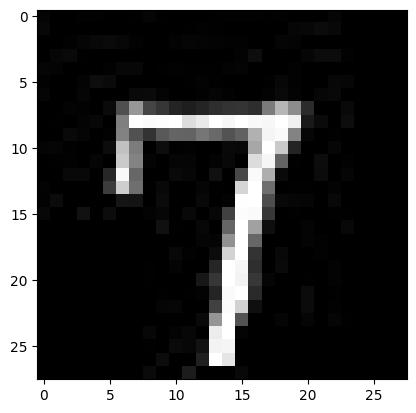

In [46]:
####loading test image

import PIL
import PIL.Image as IMG
import numpy as np

test_img = IMG.open("test.jpg")
test_image = np.asarray(test_img)
plt.imshow(test_image, cmap = "gray")
test_image.shape

In [ ]:
## we have to flatten and the reduce its dimension just like we did for test and train dataset 

test_image_flatten = test_image.reshape(1,-1) ## 28*28 = 784
test_image_flatten = test_image_flatten/255.0
test_image_flatten = pca.transform(test_image_flatten)
test_image_flatten.shape


(1, 10)

In [52]:
predict = trained_model.predict(test_image_flatten)


(-0.5, 27.5, 27.5, -0.5)

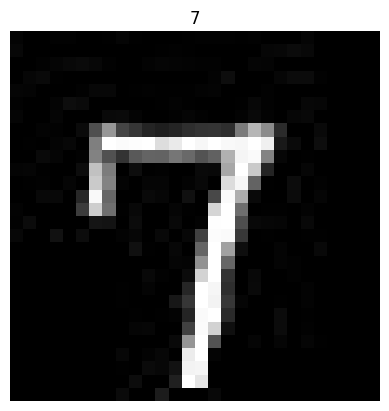

In [53]:
plt.imshow(test_image, cmap = "gray")
plt.title(str(predict[0]))
plt.axis("off")